<a href="https://colab.research.google.com/github/emilytsen/atividade_regressao/blob/main/advertising_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as r2_score
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


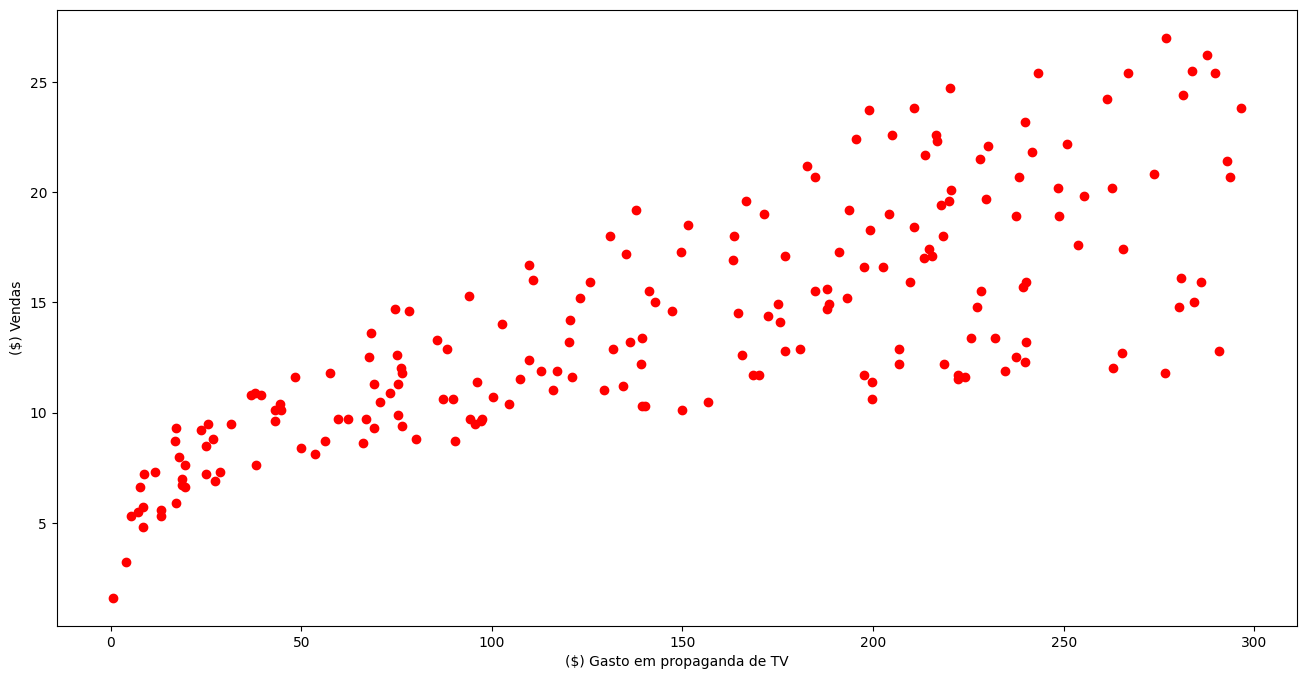

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(df['TV'],df['sales'], c='red')
plt.xlabel('($) Gasto em propaganda de TV')
plt.ylabel('($) Vendas')

plt.show()

In [ ]:
#criando o modelo

x = df['TV'].values.reshape(-1,1)
y = df['sales'].values.reshape(-1,1)

modelo = LinearRegression()
modelo.fit(x,y)

print('O modelo é: Vendas = {:.5} + {:.5}x'.format(modelo.intercept_[0], modelo.coef_[0][0]))

O modelo é: Vendas = 7.0326 + 0.047537x


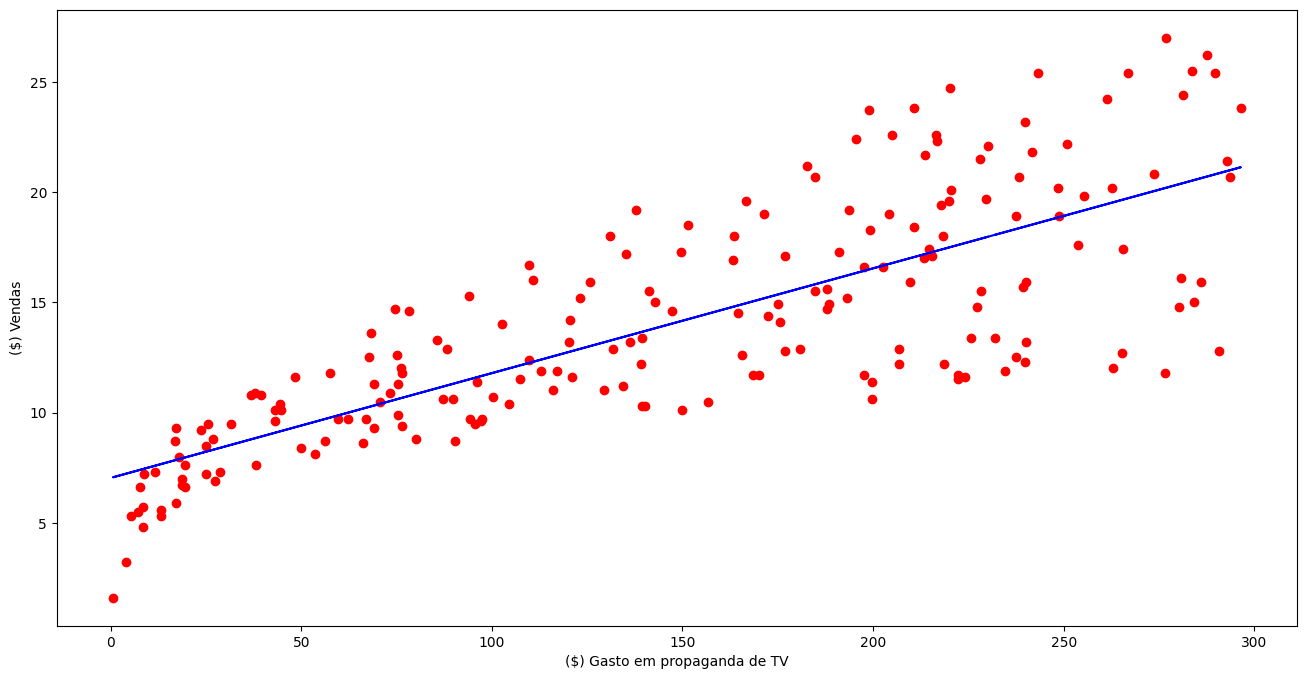

In [ ]:
#fanzendo um gráfico para apresentar a regressão

plt.figure(figsize = (16,8))
plt.scatter(x,y, c='red')
plt.plot(x, modelo.predict(x), color='blue')

plt.xlabel('($) Gasto em propaganda de TV')
plt.ylabel('($) Vendas')

plt.show()


In [ ]:
#avaliando a precisão do modelo
x = df['TV']
y = df['sales']

x2 = sm.add_constant(x)
modelo_estatistico = sm.OLS(y,x2)
modelo_estatistico = modelo_estatistico.fit()
print(modelo_estatistico.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.47e-42
Time:                        17:30:35   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [ ]:
#reaplicando o modelo
Xs = df.drop(columns=['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)

modelo = LinearRegression()
modelo.fit(Xs,y)

print('O modelo é: Vendas = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper'.format(modelo.intercept_[0], modelo.coef_[0][0], modelo.coef_[0][1], modelo.coef_[0][2]))

O modelo é: Vendas = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


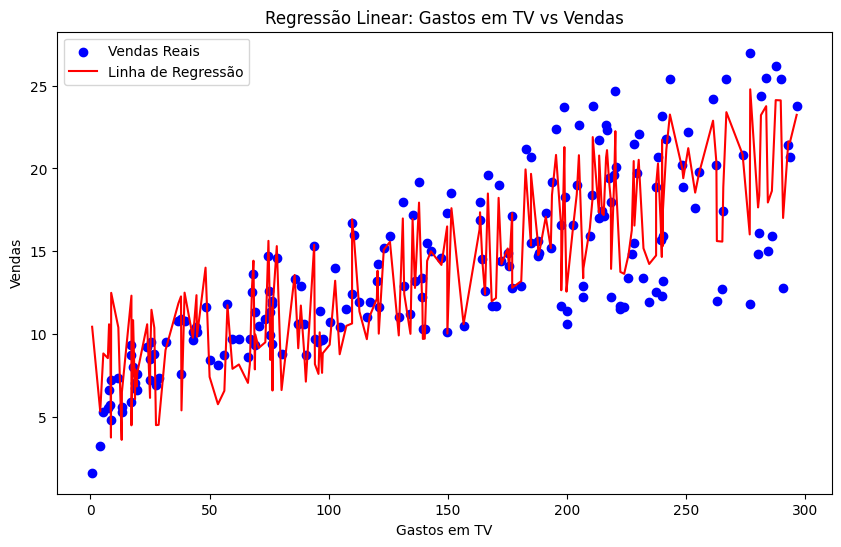

In [ ]:
# Reaplicando o modelo
Xs = df.drop(columns=['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)

modelo = LinearRegression()
modelo.fit(Xs, y)

# Fazendo as previsões
y_pred = modelo.predict(Xs)

# Ordenando os valores de TV para uma linha de regressão mais clara
sorted_index = np.argsort(df['TV'])
x_sorted = df['TV'].values[sorted_index]
y_pred_sorted = y_pred[sorted_index]

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando os dados reais
plt.scatter(df['TV'], y, color='blue', label='Vendas Reais')

# Plotando a linha de regressão
plt.plot(x_sorted, y_pred_sorted, color='red', label='Linha de Regressão')

# Adicionando os labels e título
plt.xlabel('Gastos em TV')
plt.ylabel('Vendas')
plt.title('Regressão Linear: Gastos em TV vs Vendas')
plt.legend()

# Mostrando o gráfico
plt.show()